In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.offline as py
import plotly.express as px
from plotly.offline import iplot
import plotly.io as pio

from plotly.subplots import make_subplots
from plotly.graph_objs import Scatter, Layout, Figure, Data, Stream, YAxis, Marker, Bar, Line

import warnings
warnings.simplefilter(action='ignore', category=Warning)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/learnplatform-covid19-impact-on-digital-learning/products_info.csv
/kaggle/input/learnplatform-covid19-impact-on-digital-learning/README.md
/kaggle/input/learnplatform-covid19-impact-on-digital-learning/districts_info.csv
/kaggle/input/learnplatform-covid19-impact-on-digital-learning/engagement_data/6345.csv
/kaggle/input/learnplatform-covid19-impact-on-digital-learning/engagement_data/9812.csv
/kaggle/input/learnplatform-covid19-impact-on-digital-learning/engagement_data/2339.csv
/kaggle/input/learnplatform-covid19-impact-on-digital-learning/engagement_data/5404.csv
/kaggle/input/learnplatform-covid19-impact-on-digital-learning/engagement_data/5150.csv
/kaggle/input/learnplatform-covid19-impact-on-digital-learning/engagement_data/1624.csv
/kaggle/input/learnplatform-covid19-impact-on-digital-learning/engagement_data/3188.csv
/kaggle/input/learnplatform-covid19-impact-on-digital-learning/engagement_data/7964.csv
/kaggle/input/learnplatform-covid19-impact-on-digital-learni

In [2]:
#Reading files
file_path_product = '/kaggle/input/learnplatform-covid19-impact-on-digital-learning/products_info.csv'
file_path_district = '/kaggle/input/learnplatform-covid19-impact-on-digital-learning/districts_info.csv'
df_product = pd.read_csv(file_path_product, encoding='utf8')
df_district = pd.read_csv(file_path_district, encoding='utf8')

A helper fuction that pulls out all the engagement data related files by itering through the engagement data folder. 

In [3]:
#Creting a list of all filenames
def append_filename():
    filename_list = []
    for filenames in os.walk('../input/learnplatform-covid19-impact-on-digital-learning/engagement_data/'):
        for filename in filenames:
            for csv in filename:
                if csv.find('.csv') >0:
                    filename_list.append(csv)
    return filename_list


Below function creates a combined files fo all the engagement data. 

In [4]:
#Creating a function to join all files together
def append_engagement_data():
    columns = ['time', 'lp_id', 'pct_access', 'engagement_index']
    df_master = pd.DataFrame(columns=columns)
    filename_list = append_filename()
    for filename in filename_list:
        file_path = f'../input/learnplatform-covid19-impact-on-digital-learning/engagement_data/{filename}'
        df_to_append = pd.read_csv(file_path, encoding='utf8')
        df_master = df_master.append(df_to_append)
    return df_master

In [5]:
#Calling the function to create a master dataframe
df_master = append_engagement_data()


In [6]:
#Removing all NaN values
df_master.dropna(inplace = True)

In [7]:
df_master.columns

Index(['time', 'lp_id', 'pct_access', 'engagement_index'], dtype='object')

In [8]:
#Using klib for EDA
!pip install klib
import sys

sys.path.append('../input/klib-library-python')
import klib

Large dataset detected, using 10000 random samples for the plots. Summary statistics are still based on the entire dataset.


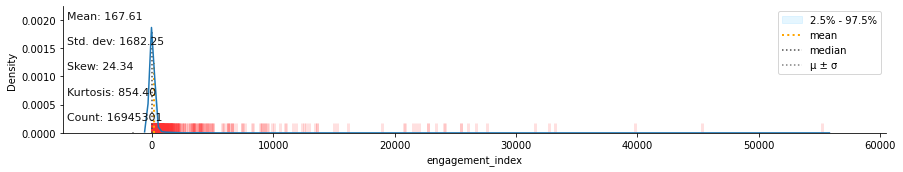

In [9]:
klib.dist_plot(df_master['engagement_index']);

In [10]:
#EDA for df_product
df_product.head(10)


,LP ID,URL,Product Name,Provider/Company Name,Sector(s),Primary Essential Function
0,13117,https://www.splashmath.com,SplashLearn,StudyPad Inc.,PreK-12,LC - Digital Learning Platforms
1,66933,https://abcmouse.com,ABCmouse.com,"Age of Learning, Inc",PreK-12,LC - Digital Learning Platforms
2,50479,https://www.abcya.com,ABCya!,"ABCya.com, LLC",PreK-12,"LC - Sites, Resources & Reference - Games & Si..."
3,92993,http://www.aleks.com/,ALEKS,McGraw-Hill PreK-12,PreK-12; Higher Ed,LC - Digital Learning Platforms
4,73104,https://www.achieve3000.com/,Achieve3000,Achieve3000,PreK-12,LC - Digital Learning Platforms
5,37600,http://www.activelylearn.com/,Actively Learn,Actively Learn,PreK-12,LC - Digital Learning Platforms
6,18663,http://www.adaptedmind.com,AdaptedMind,GloWorld,PreK-12,LC - Digital Learning Platforms
7,65131,http://www.amplify.com/,Amplify,"Amplify Education, Inc.",PreK-12,LC - Courseware & Textbooks
8,26491,http://www.answers.com/,Answers,Answers,PreK-12; Higher Ed,LC - Study Tools - Q&A
9,56441,http://www.audible.com,Audible,"Amazon.com, Inc.",PreK-12; Higher Ed; Corporate,"LC - Sites, Resources & Reference - Streaming ..."


In [11]:
df_dist = df_district.copy()
df_dist.isnull().sum()


district_id                   0
state                        57
locale                       57
pct_black/hispanic           57
pct_free/reduced             85
county_connections_ratio     71
pp_total_raw                115
dtype: int64

In [12]:
df_dist.head(10)

,district_id,state,locale,pct_black/hispanic,pct_free/reduced,county_connections_ratio,pp_total_raw
0,8815,Illinois,Suburb,"[0, 0.2[","[0, 0.2[","[0.18, 1[","[14000, 16000["
1,2685,NaN,NaN,NaN,NaN,NaN,NaN
2,4921,Utah,Suburb,"[0, 0.2[","[0.2, 0.4[","[0.18, 1[","[6000, 8000["
3,3188,NaN,NaN,NaN,NaN,NaN,NaN
4,2238,NaN,NaN,NaN,NaN,NaN,NaN
5,5987,Wisconsin,Suburb,"[0, 0.2[","[0, 0.2[","[0.18, 1[","[10000, 12000["
6,3710,Utah,Suburb,"[0, 0.2[","[0.4, 0.6[","[0.18, 1[","[6000, 8000["
7,7177,North Carolina,Suburb,"[0.2, 0.4[","[0.2, 0.4[","[0.18, 1[","[8000, 10000["
8,9812,Utah,Suburb,"[0, 0.2[","[0.2, 0.4[","[0.18, 1[","[6000, 8000["
9,6584,North Carolina,Rural,"[0.4, 0.6[","[0.6, 0.8[","[0.18, 1[","[8000, 10000["


In [13]:
df_dist = df_dist.dropna(subset=['state'])
df_dist.isnull().sum()


district_id                  0
state                        0
locale                       0
pct_black/hispanic           0
pct_free/reduced            28
county_connections_ratio    14
pp_total_raw                58
dtype: int64

Columns ['pct_black/hispanic','pct_free/reduced', 'county_connections_ratio', 'pp_total_raw'] has unncessary brackets. Those needs to be removed. 

In [14]:
df_dist['pct_black/hispanic'] = df_dist['pct_black/hispanic'].apply(lambda x: str(x)[1:-1])
df_dist['pct_free/reduced'] = df_dist['pct_free/reduced'].apply(lambda x: str(x)[1:-1])
df_dist['county_connections_ratio'] = df_dist['county_connections_ratio'].apply(lambda x: str(x)[1:-1])
df_dist['pp_total_raw'] = df_dist['pp_total_raw'].apply(lambda x: str(x)[1:-1])


In [15]:
df_dist[["pct_black","pct_hispanic" ]]= df_dist["pct_black/hispanic"].str.split(",", n = 1, expand = True) 
df_dist[["pct_free","pct_reduced" ]]= df_dist["pct_free/reduced"].str.split(",", n = 1, expand = True) 
df_dist[["ratio_min","ratio_ave"]]= df_dist["county_connections_ratio"].str.split(",", n = 1, expand = True) 
df_dist[["pp_total_min","pp_total_max" ]]= df_dist["pp_total_raw"].str.split(",", n = 1, expand = True) 

In [16]:
df_dist.head(10)

,district_id,state,locale,pct_black/hispanic,pct_free/reduced,county_connections_ratio,pp_total_raw,pct_black,pct_hispanic,pct_free,pct_reduced,ratio_min,ratio_ave,pp_total_min,pp_total_max
0,8815,Illinois,Suburb,"0, 0.2","0, 0.2","0.18, 1","14000, 16000",0,0.2,0,0.2,0.18,1,14000,16000
2,4921,Utah,Suburb,"0, 0.2","0.2, 0.4","0.18, 1","6000, 8000",0,0.2,0.2,0.4,0.18,1,6000,8000
5,5987,Wisconsin,Suburb,"0, 0.2","0, 0.2","0.18, 1","10000, 12000",0,0.2,0,0.2,0.18,1,10000,12000
6,3710,Utah,Suburb,"0, 0.2","0.4, 0.6","0.18, 1","6000, 8000",0,0.2,0.4,0.6,0.18,1,6000,8000
7,7177,North Carolina,Suburb,"0.2, 0.4","0.2, 0.4","0.18, 1","8000, 10000",0.2,0.4,0.2,0.4,0.18,1,8000,10000
8,9812,Utah,Suburb,"0, 0.2","0.2, 0.4","0.18, 1","6000, 8000",0,0.2,0.2,0.4,0.18,1,6000,8000
9,6584,North Carolina,Rural,"0.4, 0.6","0.6, 0.8","0.18, 1","8000, 10000",0.4,0.6,0.6,0.8,0.18,1,8000,10000
10,1044,Missouri,Suburb,"0, 0.2","0, 0.2",a,"10000, 12000",0,0.2,0,0.2,a,None,10000,12000
11,7457,Washington,City,"0.4, 0.6","0.4, 0.6","0.18, 1","12000, 14000",0.4,0.6,0.4,0.6,0.18,1,12000,14000
12,1904,Connecticut,Rural,"0, 0.2","0, 0.2","0.18, 1",a,0,0.2,0,0.2,0.18,1,a,None


In [17]:
df_dist['ratio_min'].unique()

array(['0.18', 'a', '1'], dtype=object)

### Conclusion 
The distribution of the engagmend index is averaged around 167.21. 


The challenge is focussed on answering questions whether the digial learning engaged the students? Alos, does digital learning is beneficial to all group of communites? The notebook explore answering those questions?

Q1. What is the picture of digital connectivity and engagement in 2020?

In [18]:
df = df_master.copy()

In [19]:
count = df['lp_id'].unique()
len(count)

8292

In [20]:
def graph_distribution(df_master):
    
    #Plotting figure
    fig = px.histogram(x = df_demand_supply.index.get_level_values(0), y = df_demand_supply['AvailableMW'], color = df_demand_supply.index.get_level_values(1), labels={'color': "Technology"})
    fig.update_xaxes(title_text="<b>Datetime</b>")
    fig.update_yaxes(title_text="<b> Electricity in MW </b>")
   
    
    #setting graph title
    title_text = f'Showing available MW by technologies at a daily frequency for {year} year'
    fig.update_layout(title_text= title_text)
    
    fig.show()

#Checking for missing values